In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("cardio_train.csv")  
df1=pd.read_csv("cardio_train.csv", delimiter=';')
df1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Perform data pre-processing operations.

In [3]:
print(df1.columns)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [4]:
from sklearn.preprocessing import StandardScaler

# Step 1: Convert 'age' from days to years
df1['age'] = (df1['age'] / 365).astype(int)

# Step 2: Check for missing values
missing_values = df1.isnull().sum()

# Step 3: Remove duplicate rows
df1.drop_duplicates(inplace=True)

# Step 4: Scale numerical features
scaler = StandardScaler()
# Define column names (not DataFrame slices)
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

# Check results
df1.info(), missing_values
df1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  float64
 6   ap_lo        70000 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.419800,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,1,0.319110,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,2,-0.272018,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,3,-0.715364,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,4,-0.863146,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,-0.124236,2,0.443452,0.124642,-0.057251,-0.088238,1,1,1,0,1,0
69996,99995,1.205802,1,-0.774565,3.597913,0.072610,-0.035180,2,2,0,0,1,1
69997,99996,-0.124236,2,2.270477,2.139139,0.332333,-0.035180,3,1,0,1,0,1
69998,99998,1.205802,1,-0.165556,-0.153219,0.040145,-0.088238,1,2,0,0,0,1


# As a part of data analysis and visualizations draw all the possible plots to provide essential informations and to derive some meaningful insights.


C:\Users\user\AppData\Local\Temp\ipykernel_19824\856624396.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df1, palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_19824\856624396.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=df1, palette='Set1')


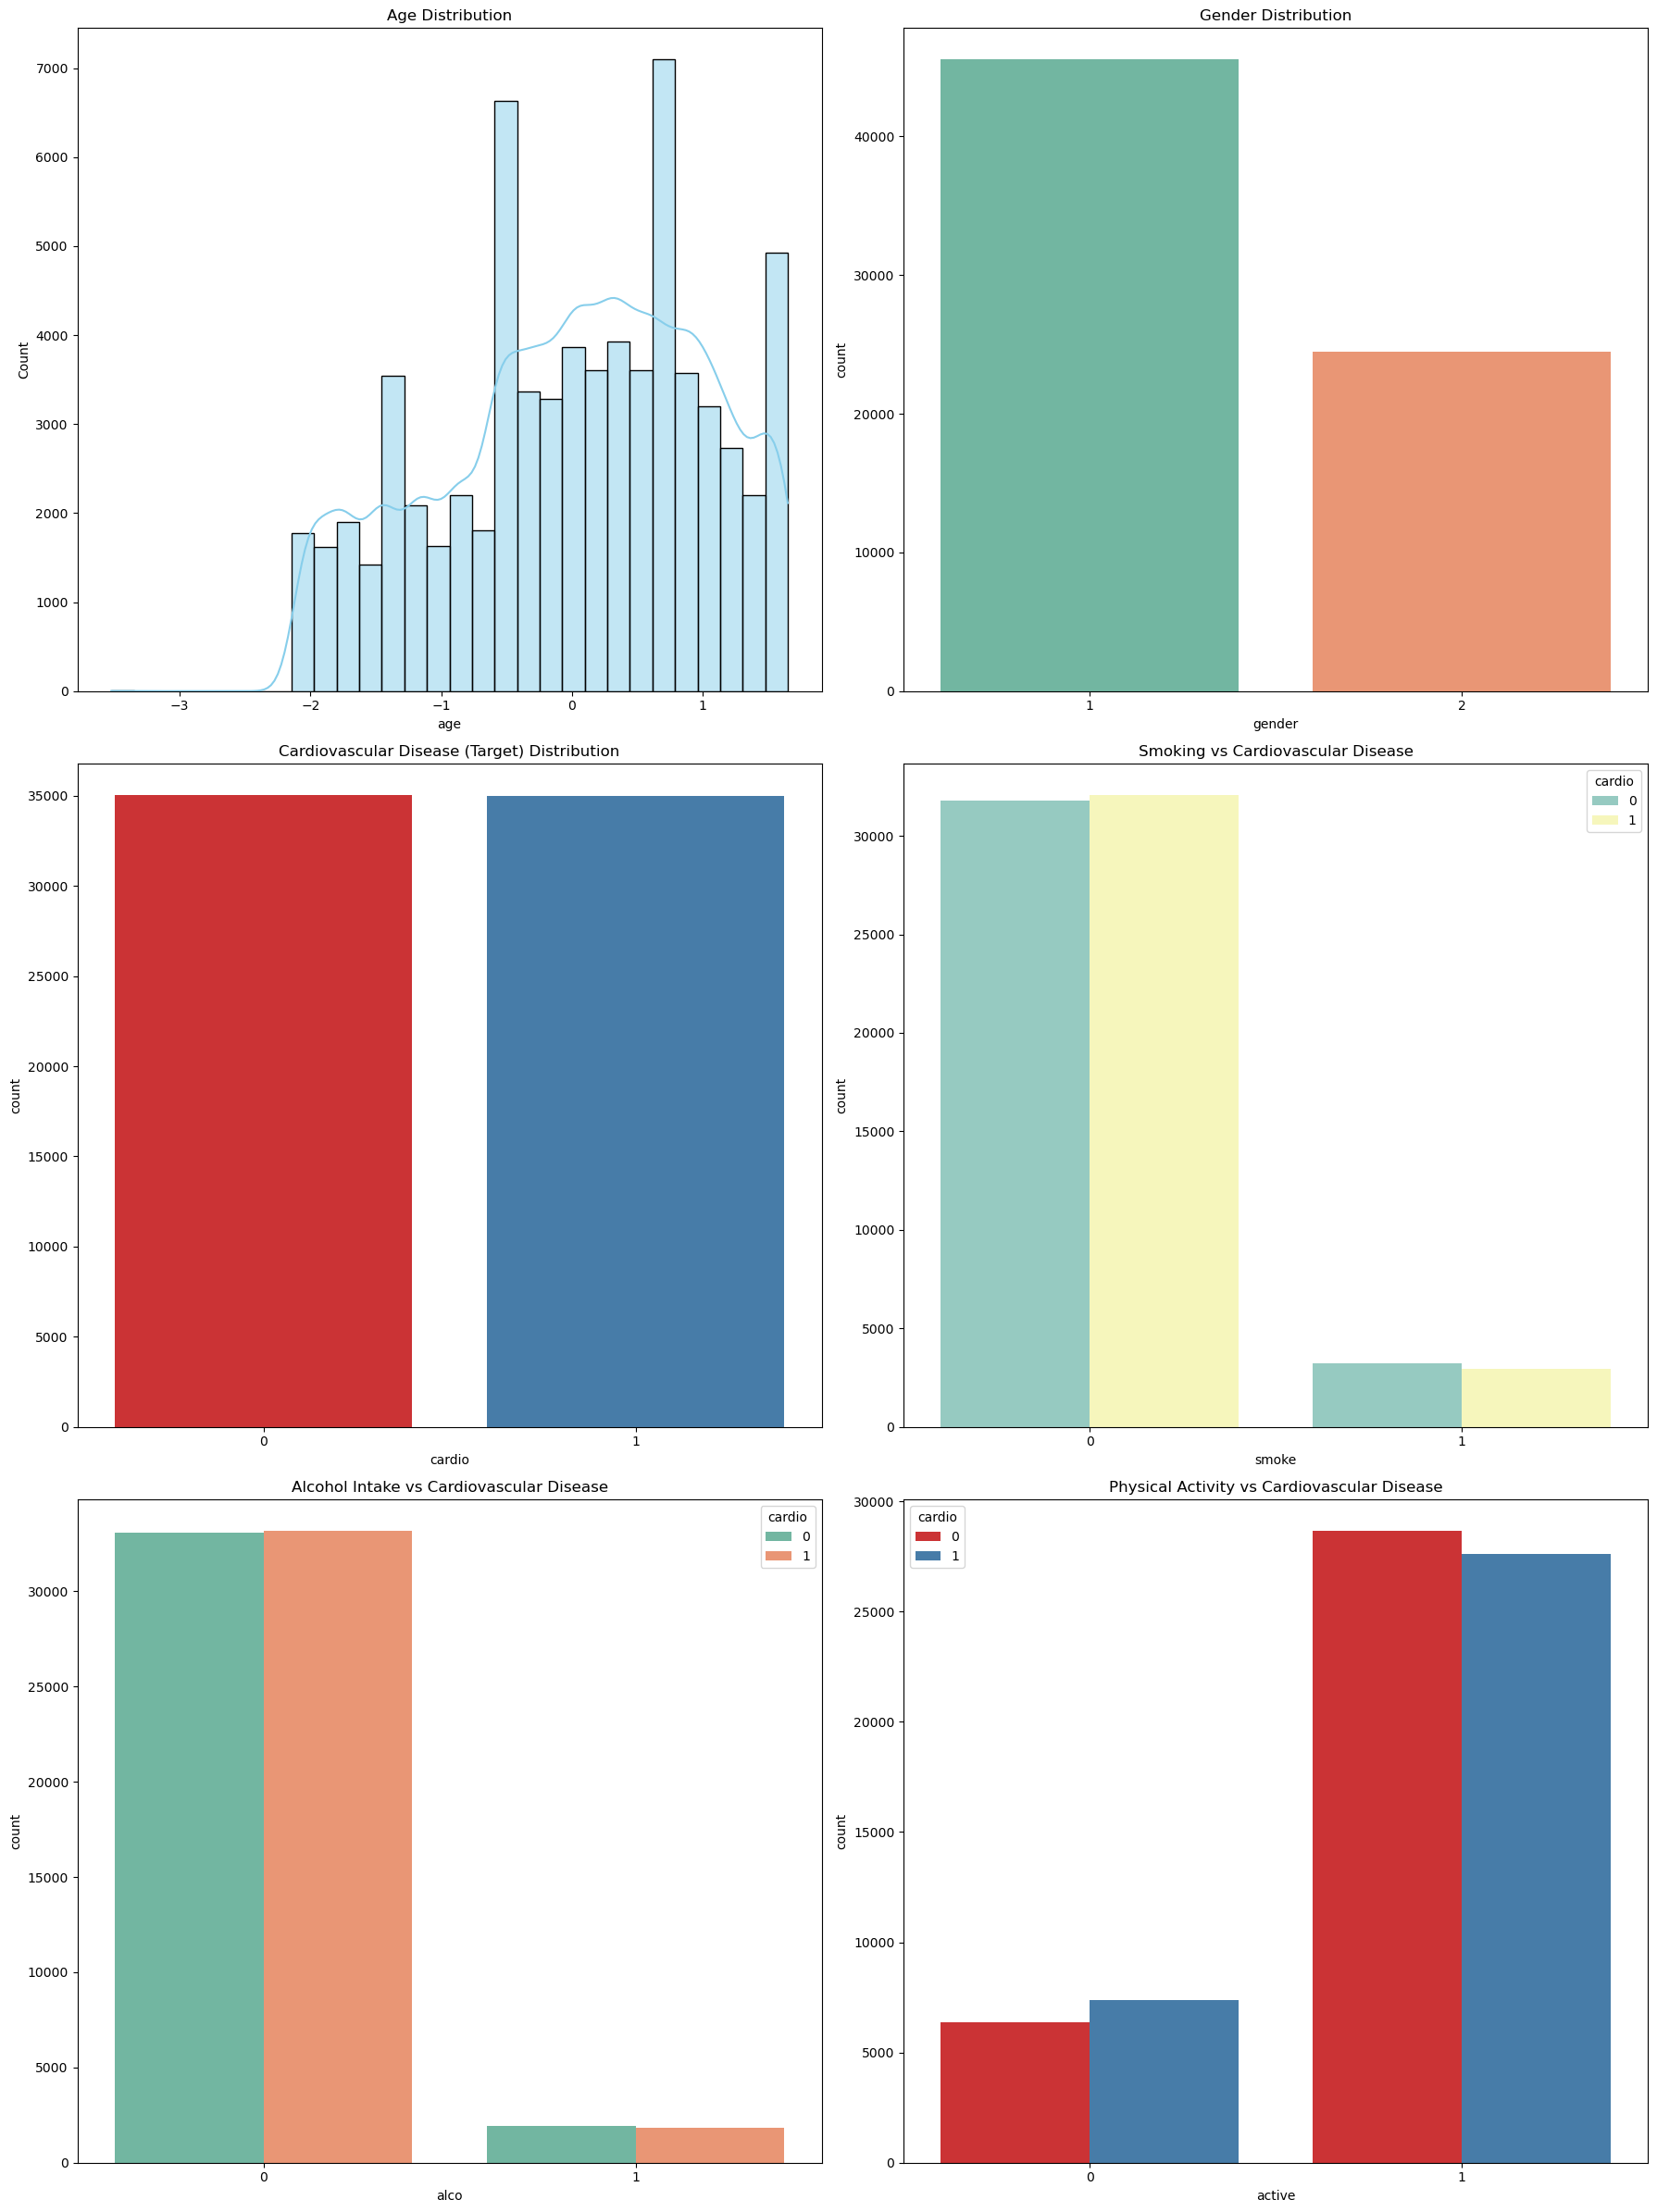

In [5]:
# Step 2: Remove duplicates
df1.drop_duplicates(inplace=True)

# Step 3: Basic summary statistics
summary_stats = df1.describe()

# Step 4: Plotting
plt.figure(figsize=(18, 24))

# 1. Age distribution
plt.subplot(3, 2, 1)
sns.histplot(df1['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

# 2. Gender distribution
plt.subplot(3, 2, 2)
sns.countplot(x='gender', data=df1, palette='Set2')
plt.title('Gender Distribution')

# 3. Target distribution (Cardiovascular Disease presence)
plt.subplot(3, 2, 3)
sns.countplot(x='cardio', data=df1, palette='Set1')
plt.title('Cardiovascular Disease (Target) Distribution')

# 4. Smoking vs Cardiovascular Disease
plt.subplot(3, 2, 4)
sns.countplot(x='smoke', hue='cardio', data=df1, palette='Set3')
plt.title('Smoking vs Cardiovascular Disease')

# 5. Alcohol intake vs Cardiovascular Disease
plt.subplot(3, 2, 5)
sns.countplot(x='alco', hue='cardio', data=df1, palette='Set2')
plt.title('Alcohol Intake vs Cardiovascular Disease')

# 6. Physical activity vs Cardiovascular Disease
plt.subplot(3, 2, 6)
sns.countplot(x='active', hue='cardio', data=df1, palette='Set1')
plt.title('Physical Activity vs Cardiovascular Disease')

plt.tight_layout()
plt.show()

# Show your correlation matrix of features according to the datasets.

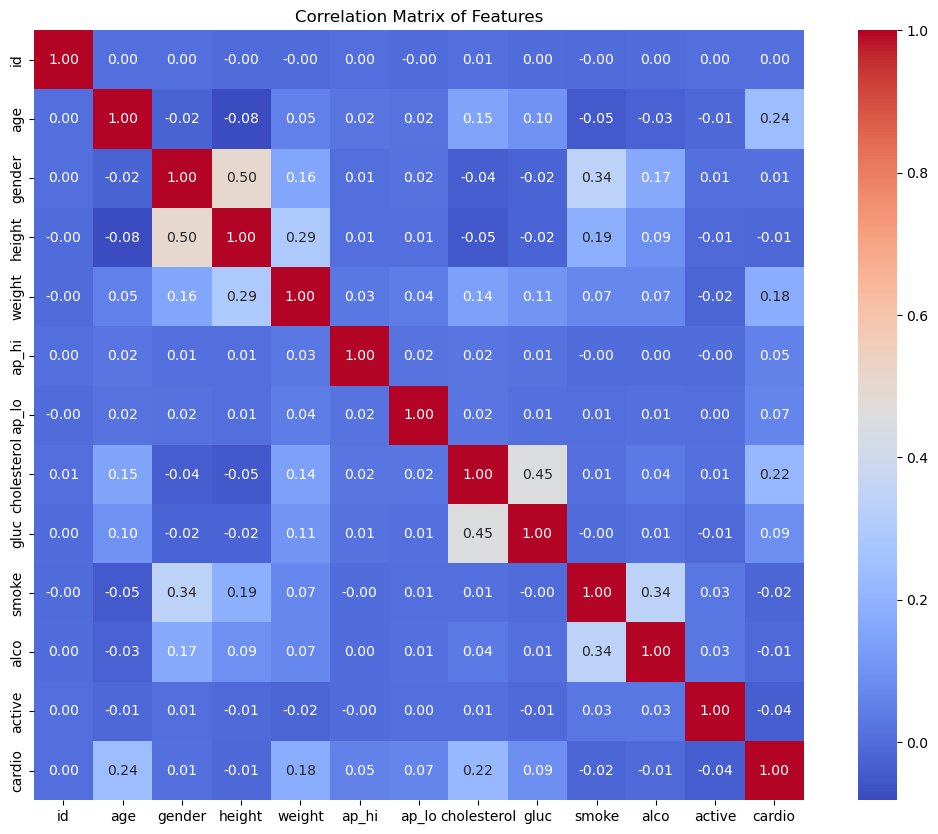

In [6]:

# Compute correlation matrix
correlation_matrix = df1.corr()

# Set the plot size
plt.figure(figsize=(14, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Title
plt.title("Correlation Matrix of Features")
plt.show()


# Find out accuracy levels of various machine learning techniques such as Support Vector Machines (SVM), K-Nearest Neighbor (KNN), Decision Trees (DT) ,Logistic Regression (LR) and Random Forest (RF).

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Features and target
X = df1.drop(columns='cardio')
y = df1['cardio']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"\n{name}")
        print(f"Accuracy  : {acc:.4f}")
        print(f"Precision : {prec:.4f}")
        print(f"Recall    : {rec:.4f}")
        print(f"F1 Score  : {f1:.4f}")

    except Exception as e:
        print(f"\n{name} failed with error: {e}")



Logistic Regression
Accuracy  : 0.7145
Precision : 0.7320
Recall    : 0.6762
F1 Score  : 0.7030

Decision Tree
Accuracy  : 0.6345
Precision : 0.6334
Recall    : 0.6377
F1 Score  : 0.6355

Random Forest
Accuracy  : 0.7197
Precision : 0.7286
Recall    : 0.6998
F1 Score  : 0.7139

KNN
Accuracy  : 0.6275
Precision : 0.6317
Recall    : 0.6105
F1 Score  : 0.6209

SVM
Accuracy  : 0.7253
Precision : 0.7397
Recall    : 0.6947
F1 Score  : 0.7165


# Build your Machine learning model for heart disease detection according to the result

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 4. Initialize the best-performing model (e.g., Random Forest)
final_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Train the model
final_model.fit(X_train, y_train)

# 6. Make predictions
y_pred = final_model.predict(X_test)

# 7. Evaluate the model
print("📊 Final Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


📊 Final Model Performance:
Confusion Matrix:
 [[5172 1832]
 [2109 4887]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      7004
           1       0.73      0.70      0.71      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Accuracy: 0.7185
